<a href="https://colab.research.google.com/github/aryanibos/Information-Retrival/blob/main/P1_IR_AryaIsnaidi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktik Information Retrival


In [31]:
import pandas as pd

df = pd.read_xml('/content/kompas-beritaPart1.xml')
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [33]:
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [34]:
def caseFolding(text):
  text = text.lower()
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')



original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
case folded: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


In [35]:
import re

def punctuationRemoval(text):
  text = re.sub(r'[^\w\s]','',text)
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
punctuation removed: Terima kasih Kak Kamu sangat baik sekali kepadaku hari ini


In [36]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [37]:
def tokenize(text):
  return text.split(" ")

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


In [38]:
df['tokens'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, , ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, , sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, , resmi, diperkenalkan, p..."


In [39]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
  for token in tokens:
    all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
133,yang,6450
10,di,5824
126,dan,4915
2,,4264
35,ini,2744


In [40]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
133,yang,6450,1
10,di,5824,2
126,dan,4915,3
2,,4264,4
35,ini,2744,5


In [41]:
term_freq_df_sorted['Rank'] = term_freq_df_sorted['freq'].rank(method='first',ascending=False).astype(int)

tf_sorted_rank = term_freq_df_sorted.sort_values(by='Rank', ascending=True)
tf_sorted_rank.head(20)


,term,freq,rank,Rank
133,yang,6450,1,1
10,di,5824,2,2
126,dan,4915,3,3
2,,4264,4,4
35,ini,2744,5,5
23,dengan,2625,6,6
29,untuk,2583,7,7
31,dari,2460,8,8
18,itu,2437,9,9
97,akan,2055,10,10


In [42]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=100)

,term,freq,rank,Rank,k = f * r
133,yang,6450,1,1,6450
10,di,5824,2,2,11648
126,dan,4915,3,3,14745
2,,4264,4,4,17056
35,ini,2744,5,5,13720
...,...,...,...,...,...
319,para,360,96,96,34560
1112,dapat,360,97,97,34920
10922,republikacoid,352,98,98,34496
406,lain,350,99,99,34650


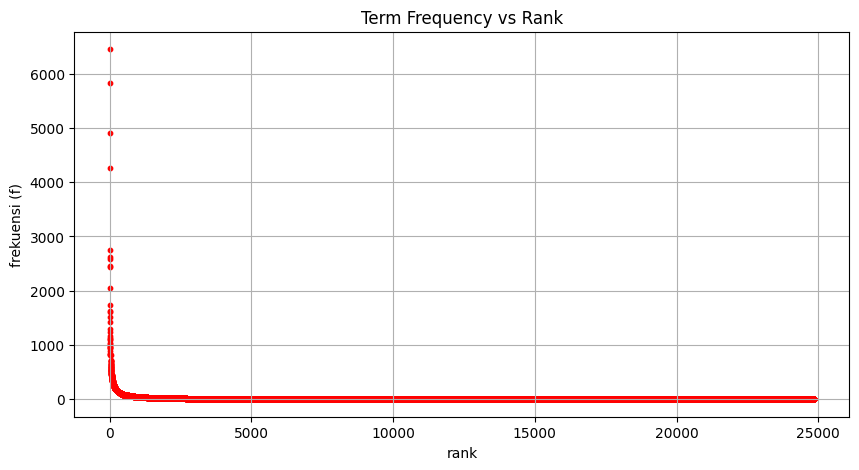

In [43]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title("Term Frequency vs Rank")
plt.xlabel("rank")
plt.ylabel("frekuensi (f)")

plt.grid(True)
plt.show()

In [45]:
import re, string, xml.etree.ElementTree as ET
from collections import Counter
import pandas as pd

PATH_XML = "/content/kompas-beritaPart1.xml"

# --- 1. Ekstrak semua teks (tanpa peduli struktur tag)
def extract_all_text(path):
    tree = ET.parse(path)
    root = tree.getroot()
    texts = []
    for elem in root.iter():
        if elem.text:
            texts.append(elem.text)
    return " ".join(texts)

raw_text = extract_all_text(PATH_XML)
print("Panjang teks:", len(raw_text))

# --- 2. Tokenisasi
def tokenize(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = re.findall(r"[a-zA-ZÀ-ÿ]+", text)
    return tokens

tokens = tokenize(raw_text)

# --- 3. Bersihkan stopword
stopwords = set("""
yang di ke dari dan untuk pada dengan tidak ini itu atau juga karena sebagai adalah dalam para akan sudah
belum bisa saja jadi agar namun serta oleh kepada bagi terhadap kalau ketika tanpa bahwa tersebut
""".split())

tokens_clean = [t for t in tokens if t not in stopwords and len(t) > 1]

# --- 4. Hitung frekuensi
freq = Counter(tokens_clean)

# --- 5. Top 10
top10 = freq.most_common(10)
df_top10 = pd.DataFrame(top10, columns=["kata", "frekuensi"])

# --- 6. Bottom 10
bottom_sorted = sorted(freq.items(), key=lambda x: (x[1], x[0]))
bottom10 = bottom_sorted[:10]
df_bottom10 = pd.DataFrame(bottom10, columns=["kata", "frekuensi"])

print("\n=== 10 Kata dengan Frekuensi Tertinggi ===")
display(df_top10)

print("\n=== 10 Kata dengan Frekuensi Terendah ===")
display(df_bottom10)


Panjang teks: 2345325

=== 10 Kata dengan Frekuensi Tertinggi ===


,kata,frekuensi
0,pesawat,1649
1,tni,1236
2,ada,1147
3,hercules,1147
4,kata,1116
5,tahun,1059
6,jakarta,1025
7,saat,991
8,saya,953
9,nasional,922



=== 10 Kata dengan Frekuensi Terendah ===


,kata,frekuensi
0,aah,1
1,aan,1
2,abaikanjika,1
3,abangpulo,1
4,abbas,1
5,abcd,1
6,abd,1
7,abdel,1
8,abdelkader,1
9,abdulgani,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['frekuensi']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'frekuensi'}, axis=1)
              .sort_values('frekuensi', ascending=True))
  xs = counted['frekuensi']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_bottom10.sort_values('frekuensi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('frekuensi')
_ = plt.ylabel('count()')